In [1]:
# < > No tengo estos simbolos en el teclado por lo que los tengo aquí para después....

%matplotlib inline
import numpy as np
import tensorflow as tf # Redes neuronales

import matplotlib.pyplot as plt # Representaciones
#from matplotlib import pyplot as plt
#plt.style.use('ggplot')

import seaborn as sns # Representaciones de correlaciones entre variables
color = sns.color_palette()
sns.set(rc={'figure.figsize':(25,15)})

import pandas as pd # Manipular los datos de forma sencilla para poder estudiarlos previamente
import zipfile # Cargar el archivo zip sin hacerlo prevamente

import plotly
#connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

import plotly.figure_factory as ff
import cufflinks as cf

import scipy.stats as stats # Predicciones estadísticas

from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

C:\Users\Usuario\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# 1 - Descarga y carga de datos
Despues de descargar los archivos en la carpeta usual de descargas haremos el proceso de carga y primer estudio utilizando pandas.

In [2]:
# Leemos directmente del zip
zip_zf = zipfile.ZipFile(r'C:\Users\Usuario\Downloads\google-play-store-apps.zip')

# Cargamos los datos en un DataFrame
df = pd.read_csv(zip_zf.open('googleplaystore.csv')).drop_duplicates()

#Hago una copia de los datos para realizar consultas
comprobacion = pd.read_csv(zip_zf.open('googleplaystore.csv'))

df.head(5) #Mostramos un ejemplo de los datos (podría ser "df.sample()")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.dtypes #Vemos de qué tipo son los datos

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

# 2 - Conversión de datos
Los datos no están en un formato muy amistoso para manejarlos. Queremos tener cada dato en el formato que más nos convenga. No nos valdrá con convertir el tipo. Primero tenemos que modificar algunos de los caracteres: 

    ['Reviews', 'Size', 'Installs', 'Price', 'Android Ver'] ----> [Int, Float, Int, Float, Cat]

### Reviews

Parece que no tenemos símbolos raros y son númers en otro formato, pero vamos a hacer unas comprobaciones

In [4]:
df.Reviews.sort_values().unique()

array(['0', '1', '10', ..., '9975', '999', '9992'], dtype=object)

In [5]:
# Como lo anterior no muestra todos los datos, veamos si podría convertir todos los valores como parece
df[df.Reviews.str.isnumeric() == False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


De no haber realizado la segunda comprobación puede que no hubiera visto esa excepción no convertible.

Fijándonos en el resto de la columna podemos ver que unos datos están reemplazados con otros, por lo que decido directamente eliminar la fila '10472' completa:

In [6]:
df = df.drop(10472) # Eliminamos la celda

# Hacemos la conversión de tipos, sabemos que no hay errores en caso de haberlos -- NaN
df.Reviews = pd.to_numeric(df.Reviews, errors='coerce') # Después utilizaremos otros mñetodos "equivalentes"
df.Reviews.sample(3) #Comprobación

7240    47777
5085      164
5326     9952
Name: Reviews, dtype: int64

### Size
Repetimos el proceso anterior siempre atentos  cualquier rareza que podamos encontrar

In [7]:
df.Size.sort_values().unique()

array(['1.0M', '1.1M', '1.2M', '1.3M', '1.4M', '1.5M', '1.6M', '1.7M',
       '1.8M', '1.9M', '10.0M', '100M', '1020k', '103k', '108k', '10M',
       '116k', '118k', '11M', '11k', '121k', '122k', '12M', '13M', '141k',
       '143k', '144k', '14M', '14k', '153k', '154k', '157k', '15M',
       '160k', '161k', '164k', '169k', '16M', '170k', '172k', '173k',
       '175k', '176k', '17M', '17k', '186k', '18M', '18k', '190k', '191k',
       '192k', '193k', '196k', '19M', '2.0M', '2.1M', '2.2M', '2.3M',
       '2.4M', '2.5M', '2.6M', '2.7M', '2.8M', '2.9M', '200k', '201k',
       '203k', '206k', '208k', '209k', '20M', '20k', '210k', '219k',
       '21M', '220k', '221k', '222k', '226k', '228k', '22M', '232k',
       '234k', '237k', '238k', '239k', '23M', '23k', '240k', '241k',
       '243k', '245k', '246k', '24M', '24k', '251k', '253k', '257k',
       '259k', '25M', '25k', '266k', '269k', '26M', '26k', '270k', '27M',
       '27k', '280k', '283k', '288k', '28M', '28k', '292k', '293k', '29M',
   

Parece que tenemos que eliminar las letras 'k' y 'M' por un lado. Por el otro tenemos "Varies with device", en este caso decido dejarlo vacío ('') para que sea convertido a NaN.

Lo dejaremos en formato float y unidad de medida "MB" (Habrá que dividir por 1000 los datos en unidades "k").

In [8]:
df.Size = df.Size.apply(lambda x: 
              (float(str(x).replace('k', ''))/1000 if 'k' in str(x) # Elim k, convertimos a float y div si está en k
               else float(str(x).replace('M', ''))) if ('k' in str(x)) or ('M' in str(x)) 
              else pd.to_numeric(str(x).replace('Varies with device', ''), errors='coerce'))
df.Size.sample(3)

10774    36.0
4881     30.0
1204      NaN
Name: Size, dtype: float64

### Installs



In [9]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

Vemos que hay dos simbolos que deberemos retirar: '+' y ','

Además, el único valor sin ninguno de los símbolos es un "0", resulta raro que una aplicación tenga 0 instalaciones por loq ue vamos a echarle un vistazo:

In [10]:
df[df.Installs.str.isnumeric() == True]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


Como vemos, la fila '9148' corresponde a una aplicación que no tiene ninguna descarga por lo que considero que lo mejor es eliminarla.

Una vez hecho, eliminaremos los caracteres "molestos" y convertiremos los datos de tipo.

In [11]:
df = df.drop(9148) #Eliminamos la celda
df.Installs = df.Installs.apply(lambda x: pd.to_numeric(str(x).replace(',', '').replace('+', ''), errors='coerce'))
df.Installs.sample(3)

3506    1000000
1320    5000000
5029        100
Name: Installs, dtype: int64

### Price

In [12]:
df.Price.sort_values().unique()

array(['$0.99', '$1.00', '$1.04', '$1.20', '$1.26', '$1.29', '$1.49',
       '$1.50', '$1.59', '$1.61', '$1.70', '$1.75', '$1.76', '$1.96',
       '$1.97', '$1.99', '$10.00', '$10.99', '$109.99', '$11.99',
       '$12.99', '$13.99', '$14.00', '$14.99', '$15.46', '$15.99',
       '$154.99', '$16.99', '$17.99', '$18.99', '$19.40', '$19.90',
       '$19.99', '$2.00', '$2.49', '$2.50', '$2.56', '$2.59', '$2.60',
       '$2.90', '$2.95', '$2.99', '$200.00', '$24.99', '$25.99', '$28.99',
       '$29.99', '$299.99', '$3.02', '$3.04', '$3.08', '$3.28', '$3.49',
       '$3.61', '$3.88', '$3.90', '$3.95', '$3.99', '$30.99', '$33.99',
       '$37.99', '$379.99', '$389.99', '$39.99', '$394.99', '$399.99',
       '$4.29', '$4.49', '$4.59', '$4.60', '$4.77', '$4.80', '$4.84',
       '$4.85', '$4.99', '$400.00', '$46.99', '$5.00', '$5.49', '$5.99',
       '$6.49', '$6.99', '$7.49', '$7.99', '$74.99', '$79.99', '$8.49',
       '$8.99', '$89.99', '$9.00', '$9.99', '0'], dtype=object)

En este caso parece que sólo tenemos que eliminar el simbolo '$', pero hacemos una comprobación extra por si a caso:

In [13]:
df[df.Price.str.replace('$', '').convert_objects(convert_numeric=True).isnull() != False]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Sabiendo que todo está correcto, procedemos a convertir:

In [14]:
df.Price = df.Price.str.replace('$', '').convert_objects(convert_numeric=True)
df.Price.sample(3)

10324    0.0
8072     0.0
10146    0.0
Name: Price, dtype: float64

### Android Ver

Para este caso, he elegido como tipo el 'Categorical' para así poder clasificar los móviles en clases, suponiendo que unos son más nuevos y otros más viejos. Puede que esto tenga alguna influencia en los rating a aplicaciones de pago o en el número de instalaciones de cada grupo.

In [15]:
df['Android Ver'].sort_values().unique()

array(['1.0 and up', '1.5 and up', '1.6 and up', '2.0 and up',
       '2.0.1 and up', '2.1 and up', '2.2 - 7.1.1', '2.2 and up',
       '2.3 and up', '2.3.3 and up', '3.0 and up', '3.1 and up',
       '3.2 and up', '4.0 and up', '4.0.3 - 7.1.1', '4.0.3 and up',
       '4.1 - 7.1.1', '4.1 and up', '4.2 and up', '4.3 and up',
       '4.4 and up', '4.4W and up', '5.0 - 6.0', '5.0 - 7.1.1',
       '5.0 - 8.0', '5.0 and up', '5.1 and up', '6.0 and up',
       '7.0 - 7.1.1', '7.0 and up', '7.1 and up', '8.0 and up',
       'Varies with device', nan], dtype=object)

Para hacerlo de una forma fácil creo que lo mejor es tomar el primer caracter de cada elemento y tomar el número cómo representante de este (en caso de no ser un número haremos con la conversión quede en NaN)

In [16]:
df['Android'] = df['Android Ver'].apply(
    lambda x: pd.to_numeric(str(x)[0], errors='coerce')).apply(
    lambda x: ('Antigua' if x>3 else 'Reciente') if x<6 else 'Nueva')

df['Android'] = pd.Categorical(df['Android'], ['Antigua', 'Reciente', 'Nueva'])
df['Android'].sample(3)

1664    Reciente
7820    Reciente
3580     Antigua
Name: Android, dtype: category
Categories (3, object): [Antigua, Reciente, Nueva]

Por último, echammos un vistazo aun ejemplo de todo junto a ver si tiene mejor pinta que al principio:

In [17]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android
2698,Flipkart Online Shopping App,SHOPPING,4.4,6012719,NaN,100000000,Free,0.00,Teen,Shopping,"August 6, 2018",Varies with device,Varies with device,Nueva
9167,Bejeweled Stars: Free Match 3,FAMILY,4.5,85484,NaN,1000000,Free,0.00,Everyone,Puzzle;Brain Games,"August 2, 2018",2.17.1,4.1 and up,Antigua
3039,Golfshot Plus: Golf GPS,SPORTS,4.1,3387,25.000,50000,Paid,29.99,Everyone,Sports,"July 11, 2018",4.18.0,4.1 and up,Antigua
8132,Security Camera CZ,HOUSE_AND_HOME,4.4,137,19.000,10000,Free,0.00,Everyone,House & Home,"July 17, 2018",1.1.10,4.1 and up,Antigua
5716,Remote For Pioneer AV Receivers and Blu-Ray,TOOLS,3.4,150,7.300,50000,Free,0.00,Everyone,Tools,"June 1, 2018",Cow V3.11,4.1 and up,Antigua
7237,CF-Bench Pro,TOOLS,4.6,159,0.029,1000,Paid,1.49,Everyone,Tools,"June 23, 2011",1.1,1.6 and up,Reciente
47,Little Teddy Bear Colouring Book Game,ART_AND_DESIGN,4.2,85,8.000,100000,Free,0.00,Everyone,Art & Design,"December 17, 2017",2.0.0,4.1 and up,Antigua
3423,Tiger Live Wallpaper,PERSONALIZATION,4.1,77724,7.100,5000000,Free,0.00,Teen,Personalization,"May 31, 2018",2.7.2,4.0 and up,Antigua
3082,"FIFA - Tournaments, Soccer News & Live Scores",SPORTS,4.2,342912,6.000,10000000,Free,0.00,Everyone,Sports,"August 3, 2018",4.3.1,4.4 and up,Antigua
3267,AT&T Smart Wi-Fi,TOOLS,3.9,18513,6.100,10000000,Free,0.00,Everyone,Tools,"April 26, 2018",3.2,4.1 and up,Antigua


# 3 - Análisis de los datos

Ahora que ya tenemos los formatos que queremos vamos a realizar un análisis para obtener información que nos permita obtener conclusiones para hipótesis que relacione las variables con el Rating de la applicación o número de instalaciones (saber cómo conseguir cualquiera de las dos sería bastante bueno para cualquier programador).

## 3.1 - Limpieza de datos
Primero vamos a comprobar si hay aplicaciones repetidas que puedan causar sobrerepresentación:

In [18]:
df[df.duplicated('App')].App.sort_values()

5415                               365Scores - Live Scores
1755                                           8 Ball Pool
1703                                           8 Ball Pool
1844                                           8 Ball Pool
3953                                           8 Ball Pool
1871                                           8 Ball Pool
1970                                           8 Ball Pool
662                        95Live -SG#1 Live Streaming App
4991                 A&E - Watch Full Episodes of TV Shows
4928                         AC - Tips & News for Android™
5448                             AP Mobile - Breaking News
2800                                                  ASOS
5512     AccuWeather: Daily Forecast & Live Weather Rep...
1143                          Acorns - Invest Spare Change
3895                                  Adobe Acrobat Reader
3524                                  Adobe Acrobat Reader
2936     Adobe Photoshop Express:Photo Editor Collage M.

Hay bastantes repeticiones, vamos a ver alguno de los ejemplos:

In [19]:
df[df.App == 'Zombie Tsunami']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android
1685,Zombie Tsunami,GAME,4.4,4920817,NaN,100000000,Free,0.0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device,Nueva
1730,Zombie Tsunami,GAME,4.4,4921122,NaN,100000000,Free,0.0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device,Nueva
1914,Zombie Tsunami,GAME,4.4,4921451,NaN,100000000,Free,0.0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device,Nueva
2008,Zombie Tsunami,GAME,4.4,4921409,NaN,100000000,Free,0.0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device,Nueva
3940,Zombie Tsunami,GAME,4.4,4918776,NaN,100000000,Free,0.0,Everyone 10+,Arcade,"June 15, 2018",Varies with device,Varies with device,Nueva


In [20]:
df[df.App == 'A&E - Watch Full Episodes of TV Shows']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android
920,A&E - Watch Full Episodes of TV Shows,ENTERTAINMENT,4.0,29706,19.0,1000000,Free,0.0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up,Antigua
4991,A&E - Watch Full Episodes of TV Shows,FAMILY,4.0,29708,19.0,1000000,Free,0.0,Teen,Entertainment,"July 16, 2018",3.1.4,4.4 and up,Antigua


Viendo estos ejemplos, dejar únicamente una aplicación de todas las que compartan nombre, rating y precio

In [21]:
df = df.drop_duplicates(['App', 'Rating', 'Price'])

In [22]:
df[df.duplicated('App')].App.sort_values()

2513                                Blood Pressure
2041                                Bubble Shooter
7446                                        CJmall
3242                                    Calculator
436                                   Call Blocker
5044    Cardiac diagnosis (heart rate, arrhythmia)
9641                                    Chess Free
8714                                   Dairy Queen
6305                          English Grammar Test
3871                                    Flashlight
6626                  High Blood Pressure Symptoms
8446                             My Photo Keyboard
2344                                Period Tracker
2933                                  Photo Editor
7570                                         Ruler
2024                                     Solitaire
5774                                  Video Editor
2010                                   Word Search
Name: App, dtype: object

Decido dejar siguientes por si son diferentes.Vamos a echar un vistazo a las estadísticas para ver si vemos algo que nos llame la atención

In [23]:
df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android
count,9676,9676,8213.000000,9.676000e+03,8448.000000,9.676000e+03,9676,9676.000000,9676,9676,9676,9668,9674,9676
unique,9658,33,NaN,NaN,NaN,NaN,2,NaN,6,119,1377,2825,33,3
top,Call Blocker,FAMILY,NaN,NaN,NaN,NaN,Free,NaN,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up,Antigua
freq,2,1834,NaN,NaN,NaN,NaN,8920,NaN,7921,829,252,1056,2209,6858
mean,NaN,NaN,4.173396,2.164792e+05,20.382715,7.790032e+06,NaN,1.097368,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.536282,1.829761e+06,21.814449,5.372309e+07,NaN,16.837403,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,0.000000e+00,0.008500,0.000000e+00,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,2.500000e+01,4.575000,1.000000e+03,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,9.720000e+02,12.000000,1.000000e+05,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,2.948750e+04,28.000000,1.000000e+06,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN


Observaciones:

- Antes que nada debemos asegurarnos de que no haya aplicaciones repetidas que puedan causar una sobrerepresentación


- No hay ningún valor fuera de los rangos esperados.


- La mayoría de aplicaciones tienen buena puntuación (4+).


- Hay aplicaciones que tienen muy pocas descargas (menos de 100). Si son pocas consideraremos eliminarlas porque podrían desvirtuar el análisis.


- La mayoría de aplicaciones son gratis o cuestan poco, pero algunas llaman la atención por el alto precio.



Veamos qué pasa con las aplicaciones con pocas descargas:

In [24]:
df[['App', 'Price', 'Installs', 'Reviews', 'Rating']][df.Installs <= 10]

,App,Price,Installs,Reviews,Rating
625,House party - live chat,0.00,10,1,1.0
630,Pet Lovers Dating,0.00,10,0,NaN
632,Latin Dating,0.00,10,0,NaN
635,Wifi Mingle,0.00,10,0,NaN
638,When Will You Get Married,0.00,10,2,NaN
639,HOW TO ASK A GIRL OUT,0.00,10,0,NaN
644,JoJo Siwa Top Hits Music,0.00,10,0,NaN
649,Healthy Relationships Guide,0.00,1,0,NaN
650,following,0.00,10,1,NaN
652,PlusOne,0.00,1,0,NaN


Como vemos son bastantes aplicaciones con Ratin = NaN, por lo que las retiramos de nuestros datos:

In [25]:
df.drop(df[df.Installs <= 10].index)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Antigua
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Antigua
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Antigua
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Antigua
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Antigua
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Reciente
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Antigua
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Antigua
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Reciente
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Antigua


Vamos a ver ahora esas aplicaciones tan "caras"

In [26]:
df[['App', 'Price', 'Installs', 'Reviews', 'Rating']][df.Price > 200]

,App,Price,Installs,Reviews,Rating
4197,most expensive app (H),399.99,100,6,4.3
4362,💎 I'm rich,399.99,10000,718,3.8
4367,I'm Rich - Trump Edition,400.00,10000,275,3.6
5351,I am rich,399.99,100000,3547,3.8
5354,I am Rich Plus,399.99,10000,856,4.0
5355,I am rich VIP,299.99,10000,411,3.8
5356,I Am Rich Premium,399.99,50000,1867,4.1
5357,I am extremely Rich,379.99,1000,41,2.9
5358,I am Rich!,399.99,1000,93,3.8
5359,I am rich(premium),399.99,5000,472,3.5


En este caso obto también por eliminar los datos ya que considero que no son representativos. En cierta manera parecen una forma de spam pero pagado....

In [27]:
df.drop(df[df.Price > 200].index)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Android
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,Antigua
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,Antigua
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,Antigua
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,Antigua
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.800,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,Antigua
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.600,50000,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,Reciente
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19.000,50000,Free,0.0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,Antigua
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29.000,1000000,Free,0.0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,Antigua
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33.000,1000000,Free,0.0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,Reciente
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.100,10000,Free,0.0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,Antigua


#### Vistazo general a los datos

In [28]:
print('Nuestro conjunto de datos está compuesto por {} observaciones y {} características. \n'.format(
    df.shape[0], df.shape[1]))
print('De las {} aplicaciones {} son gratis y {} de pago. \n'.format(
    len(df.App.unique()), 
    len(df[df.Type == 'Free'].App.unique()), 
    len(df[df.Type == 'Paid'].App.unique())))
print('Hay {} categorías de aplicaciones como por ejemplo {}. \n'.format(
    len(df.Category.unique()), ",".join(df.Category.unique()[0:5])))

Nuestro conjunto de datos está compuesto por 9676 observaciones y 14 características. 

De las 9658 aplicaciones 8904 son gratis y 756 de pago. 

Hay 33 categorías de aplicaciones como por ejemplo ART_AND_DESIGN,AUTO_AND_VEHICLES,BEAUTY,BOOKS_AND_REFERENCE,BUSINESS. 



## 3.2 - Correlaciones entre los atributos

In [29]:
df.corr() # Correlaciones

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055092,0.062513,0.040197,-0.021208
Reviews,0.055092,1.000000,0.179233,0.625059,-0.007593
Size,0.062513,0.179233,1.000000,0.134169,-0.022392
Installs,0.040197,0.625059,0.134169,1.000000,-0.009418
Price,-0.021208,-0.007593,-0.022392,-0.009418,1.000000


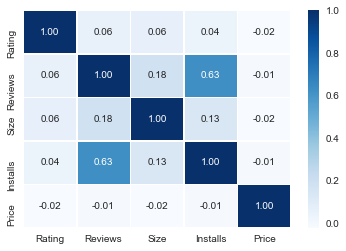

In [30]:
sns.heatmap(df.corr(), cmap="Blues", annot=True, fmt=".2f", linewidths=0.5)

Para hacernos una mejor idea vamos a representar las correlaciones de una forma más visual:

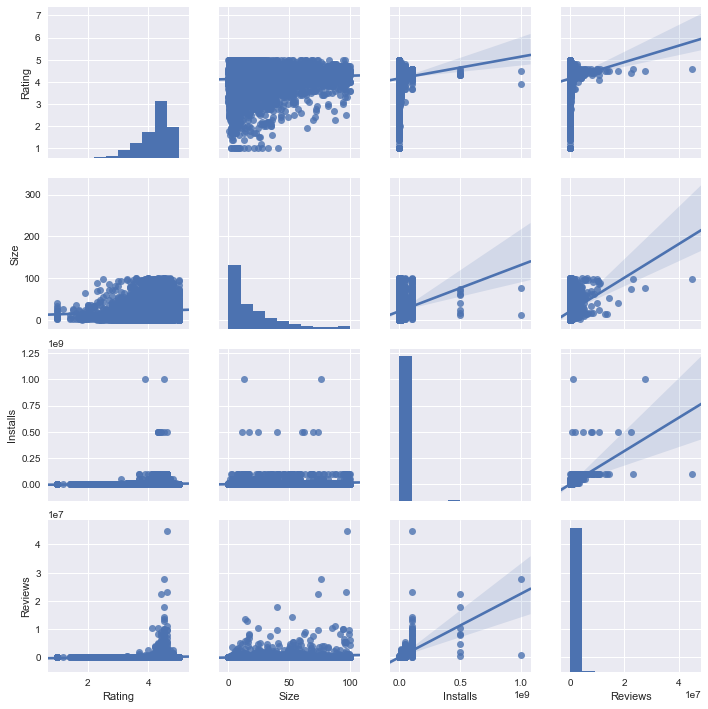

In [31]:
# Representamos los datos incluyendo la recta de regresión:
sns.pairplot(
    df[['Rating','Size', 'Installs', 'Reviews']].dropna(), 
    kind="reg", palette="Set2")

Como vemos el resultado no es muy visual, por lo que decido añadir dos columnas nuevas a la columna que acerquen las escalas de Install y Reviews a las del resto de atributos aplicando log

In [32]:
df['installs_scale'] = np.log10(df.Installs)
df['reviews_scale'] = np.log10(df.Reviews)

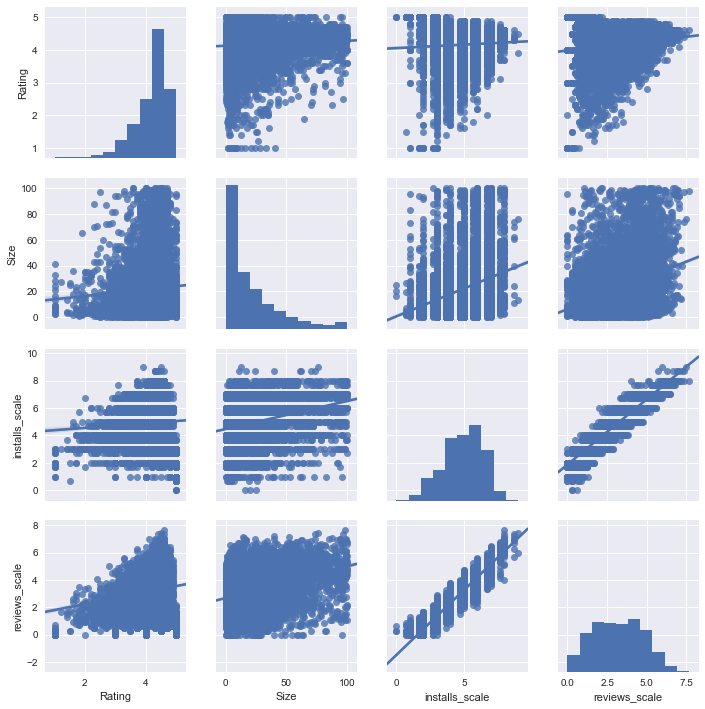

In [33]:
hue=df.Android# Representamos los datos con los cambios aplicados, incluyendo la recta de regresión:
sns.pairplot(
    df[['Rating','Size', 'installs_scale', 'reviews_scale']].dropna(), 
    kind="reg", palette="Set2")

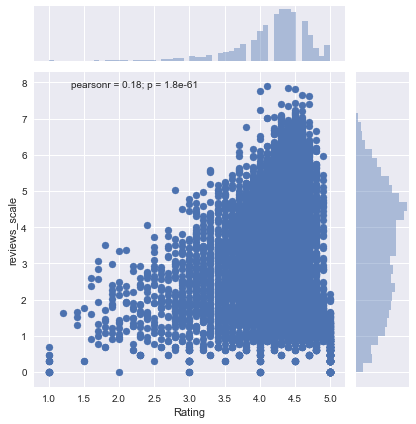

In [34]:
sns.jointplot(df.Rating, df.reviews_scale)

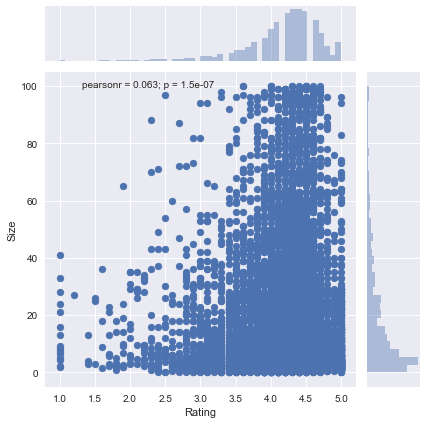

In [35]:
sns.jointplot(df.Rating, df.Size)

Conclusiones:

   - Como parecía natural hay una clara proporción entre Installs y Reviews
   
   
   - Las mejor valoradas coinciden con las más descargadas (y las más revisionadas)
   
   
   - La mayoría de aplicaciones tiene un  tamaño bajo y las aplicaciones peor valoradas coinciden con las de menor tamaño

### 3.2.1 - Vamos a ver la distribución para dos de los atributos que me interesa estudiar:

##### Tipo de App: Gratis VS pago

Free    8920
Paid     756
Name: Type, dtype: int64


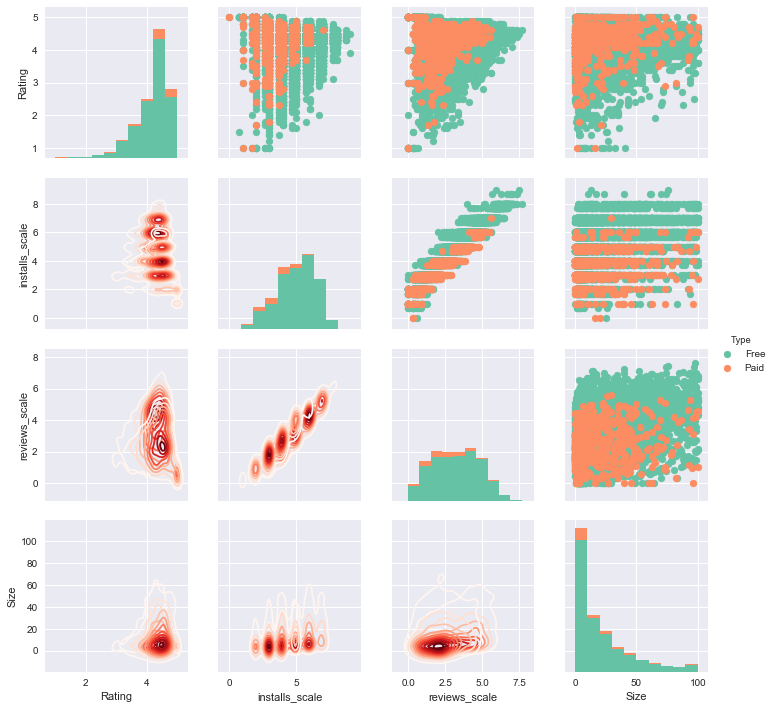

In [36]:
#Primero el tipo: Gratis o de pago

print(df.Type.value_counts())
h = sns.PairGrid(
    df[['Rating', 'installs_scale', 'reviews_scale', 'Size', 'Type', 'Android']].dropna(), 
    hue="Type", palette="Set2")
h = h.map_upper(plt.scatter)
h = h.map_diag(plt.hist)
h = h.map_lower(sns.kdeplot, cmap='Reds')
h = h.add_legend()

# La diagonal superior es quivalente a:
# sns.pairplot(
#     df[['Rating','Size', 'installs_scale', 'reviews_scale', 'Type', 'Android', 'Price']].dropna(), 
#     hue='Type', palette="Set2")

print(h)

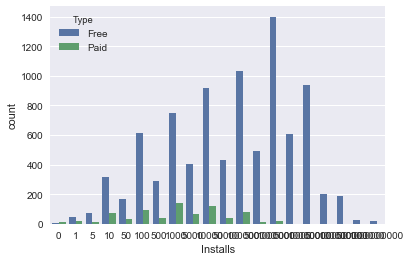

In [37]:
h1 = sns.countplot(df.Installs, hue=df.Type)

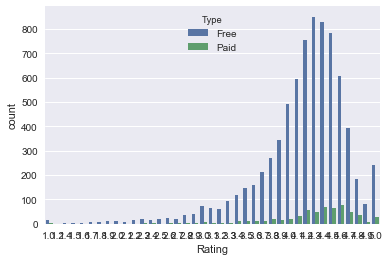

In [38]:
h2 = sns.countplot(df.Rating, hue=df.Type)

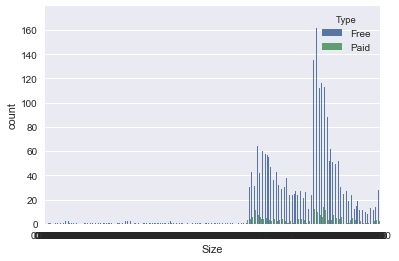

In [39]:
h3 = sns.countplot(df.Size, hue=df.Type)

Conclusiones:

   - Las aplicaciones de pago tienen mejor Rating que las gratis
   
   
   - Las aplicaciones gratis tienen mayor número de descargas como era de esperar
   
   
   - Las aplicaciones de pago son las de menor tamaño y al igual que las gratuitas están mejor valora según su tamaño aumenta   

##### Versiones de Android: "Antigua" VS "Reciente" VS "Nueva"

Antigua     6858
Reciente    1719
Nueva       1099
Name: Android, dtype: int64


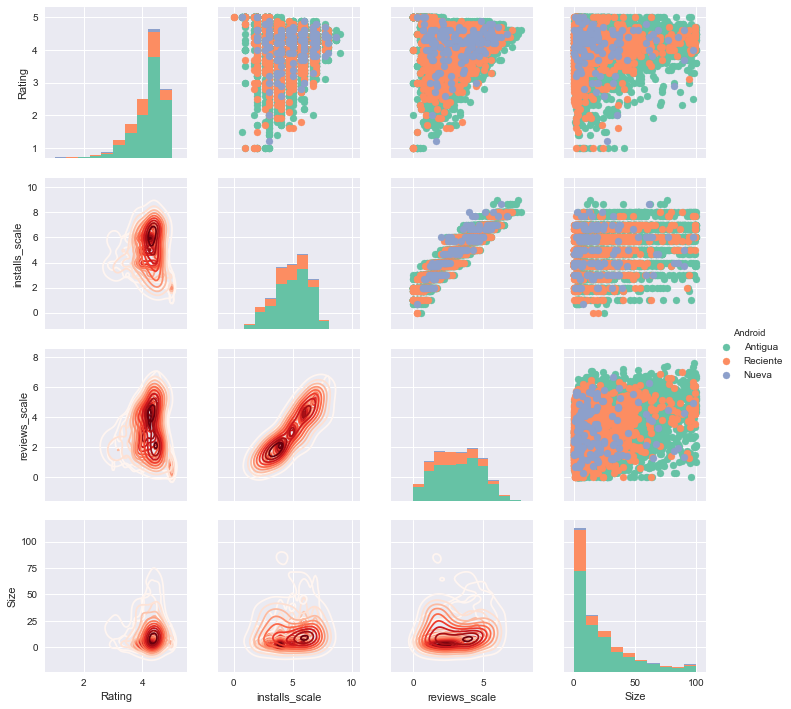

In [40]:
#Ahora miremos las versiones de Android, categoría que cree anteriormente

print(df.Android.value_counts())
g = sns.PairGrid(
    df[['Rating', 'installs_scale', 'reviews_scale', 'Size', 'Type', 'Android']].dropna(), 
    hue="Android", palette="Set2")
g = g.map_upper(plt.scatter)
g = g.map_diag(plt.hist)
g = g.map_lower(sns.kdeplot, cmap='Reds')
g = g.add_legend()

# La diagonal superior es quivalente a:
# sns.pairplot(
#     df[['Rating','Size', 'installs_scale', 'reviews_scale', 'Type', 'Android', 'Price']].dropna(), 
#     hue='Type', palette="Set2")    

print(g)

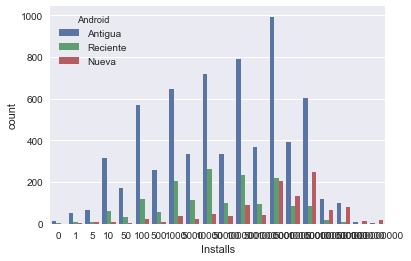

In [41]:
g1 = sns.countplot(df.Installs, hue=df.Android)

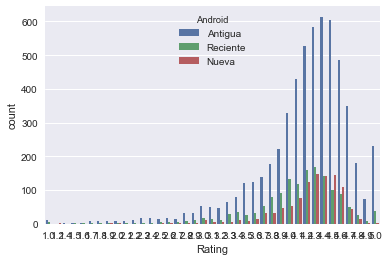

In [42]:
g2 = sns.countplot(df.Rating, hue=df.Android)

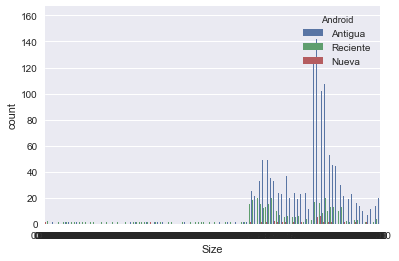

In [43]:
g3 = sns.countplot(df.Size, hue=df.Android)

Conclusiones:

   - La mayoría de las aplicaciones aceptan versiones antiguas de Android
   
   
   - Las aplicaciones que aceptan sistemas más recientes ocupan menos y son mejor valoradas

### 3.2.2 Categorías
Vamos a analizar ahora las diferentes categorías de las apps

In [44]:
number_apps_category = df['Category'].value_counts()
number_apps_frequencies = df.Category.value_counts(
    normalize=True, dropna=False).apply(
    lambda x: '{:.2%}'.format(x))

pd.merge(pd.DataFrame(number_apps_category), 
         pd.DataFrame(number_apps_frequencies),  
         left_index=True, right_index=True)

,Category_x,Category_y
FAMILY,1834,18.95%
GAME,961,9.93%
TOOLS,830,8.58%
BUSINESS,420,4.34%
MEDICAL,399,4.12%
PERSONALIZATION,376,3.89%
PRODUCTIVITY,374,3.87%
LIFESTYLE,369,3.81%
FINANCE,345,3.57%
SPORTS,325,3.36%


Entre las diez primeras categorías se encuentran más de la mitad de las aplicaciones

In [45]:
#Se podría hacer parecido con plt.pie pero el resultado utilizando plotly es mucho mejor
data = [go.Pie(labels=number_apps_category.index, values=number_apps_category.values)]
plotly.offline.iplot(data)

In [46]:
grupo1 = df.groupby('Category')
grupo1.describe()['Rating']

,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
ART_AND_DESIGN,61.0,4.357377,0.361229,3.2,4.100,4.4,4.700,5.0
AUTO_AND_VEHICLES,73.0,4.190411,0.543692,2.1,4.000,4.3,4.600,4.9
BEAUTY,42.0,4.278571,0.362603,3.1,4.000,4.3,4.575,4.9
BOOKS_AND_REFERENCE,169.0,4.344970,0.437649,2.7,4.100,4.5,4.600,5.0
BUSINESS,263.0,4.098479,0.659862,1.0,3.800,4.2,4.500,5.0
COMICS,54.0,4.181481,0.526317,2.8,3.900,4.4,4.500,5.0
COMMUNICATION,257.0,4.121401,0.469343,1.0,4.000,4.2,4.400,5.0
DATING,134.0,3.970149,0.637786,1.0,3.600,4.1,4.400,5.0
EDUCATION,118.0,4.364407,0.263612,3.5,4.200,4.4,4.600,4.9


In [47]:
grupo1.mean().sort_values(by='Rating', ascending=False)

,Rating,Reviews,Size,Installs,Price,installs_scale,reviews_scale
Category,,,,,,,
EVENTS,4.435556,2515.906250,13.963754,2.495806e+05,1.718594,3.498164,-inf
EDUCATION,4.364407,112303.764706,19.057101,2.965983e+06,0.150924,5.798874,4.044202
ART_AND_DESIGN,4.357377,22175.046875,12.370968,1.786533e+06,0.093281,-inf,-inf
BOOKS_AND_REFERENCE,4.344970,75321.234234,13.134701,7.504367e+06,0.539505,4.190657,-inf
PERSONALIZATION,4.332215,142401.808511,11.224624,4.075784e+06,0.400213,-inf,-inf
PARENTING,4.300000,15972.183333,22.512963,5.253518e+05,0.159667,4.828145,2.765741
BEAUTY,4.278571,7476.226415,13.795745,5.131519e+05,0.000000,4.526085,-inf
GAME,4.247593,649343.685744,41.835870,1.454623e+07,0.295848,5.680745,-inf
SOCIAL,4.247291,953672.807531,15.984090,2.296179e+07,0.066820,-inf,-inf


In [48]:
grupo1.mean().sort_values(by='Rating', ascending=False).head()

,Rating,Reviews,Size,Installs,Price,installs_scale,reviews_scale
Category,,,,,,,
EVENTS,4.435556,2515.906250,13.963754,2.495806e+05,1.718594,3.498164,-inf
EDUCATION,4.364407,112303.764706,19.057101,2.965983e+06,0.150924,5.798874,4.044202
ART_AND_DESIGN,4.357377,22175.046875,12.370968,1.786533e+06,0.093281,-inf,-inf
BOOKS_AND_REFERENCE,4.344970,75321.234234,13.134701,7.504367e+06,0.539505,4.190657,-inf
PERSONALIZATION,4.332215,142401.808511,11.224624,4.075784e+06,0.400213,-inf,-inf


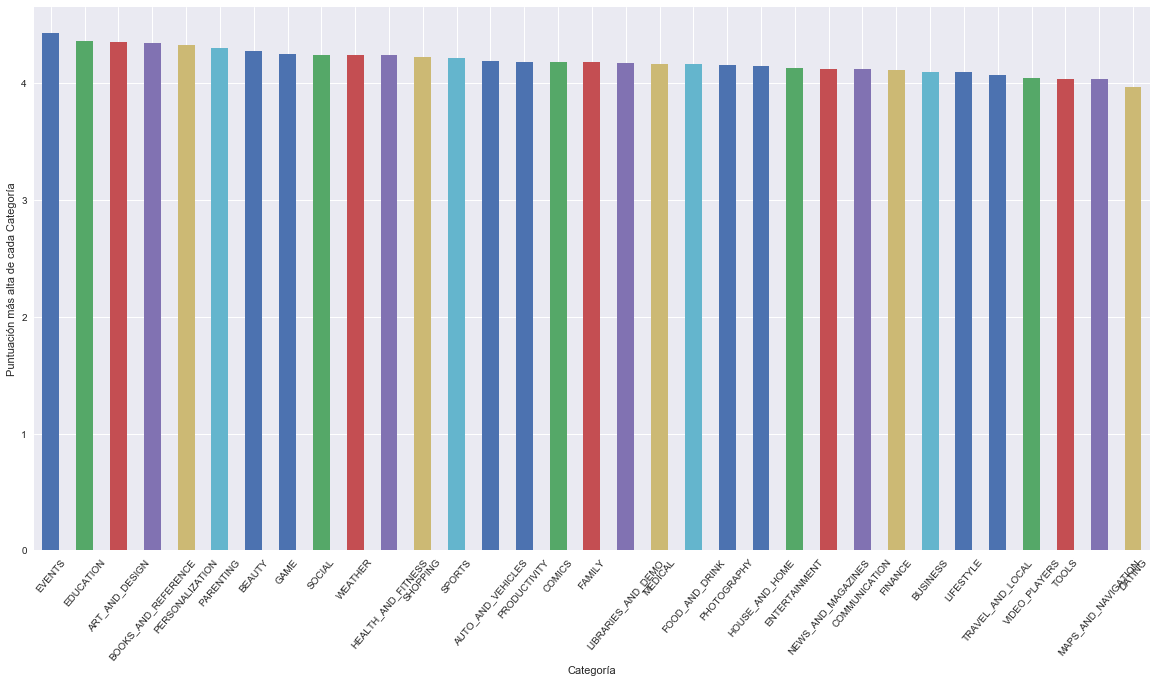

In [49]:
plt.figure(figsize=(20, 10))
grupo1.mean().sort_values(by='Rating', ascending=False)['Rating'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Categoría')
plt.ylabel('Puntuación más alta de cada Categoría')
plt.show()

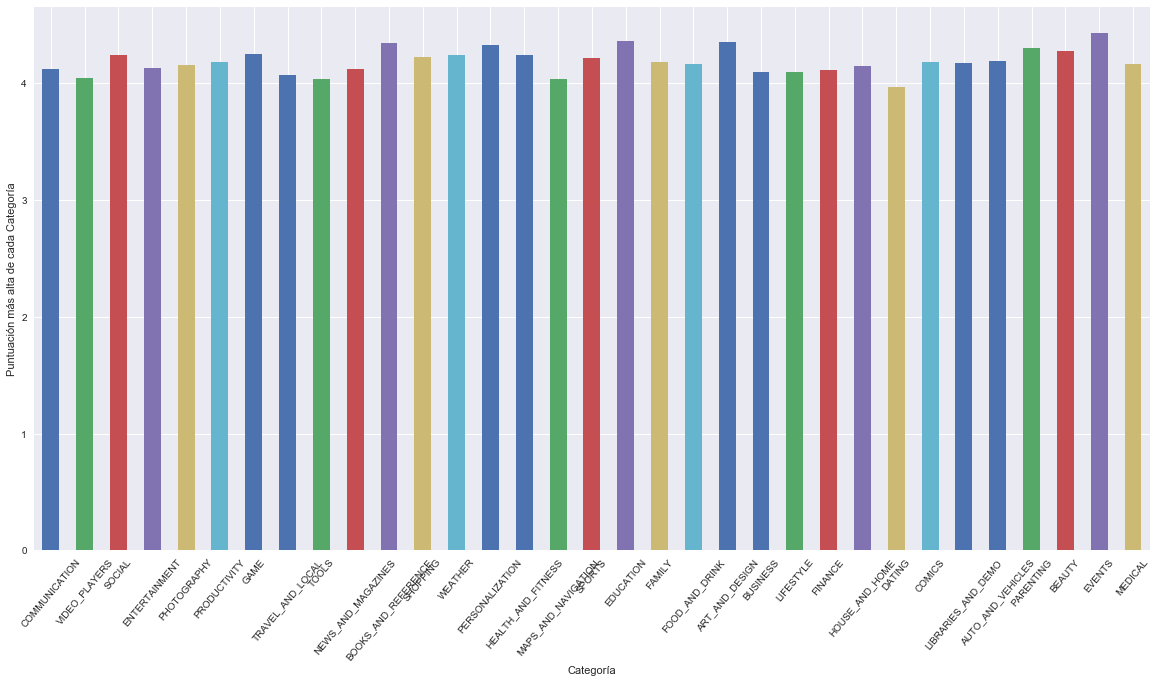

In [50]:
plt.figure(figsize=(20, 10))
grupo1.mean().sort_values(by='Installs', ascending=False)['Rating'].plot.bar()
plt.xticks(rotation=50)
plt.xlabel('Categoría')
plt.ylabel('Puntuación más alta de cada Categoría')
plt.show()

Conclusiones:

   - El único grupo de aplicaciones que tiene la media menor que 4 es el de "DATING"... Supongo tienen demasiados anuncios o que la gente echa la culpa de sus desgracias a quién no las tiene...
   - El resto de grupos no parece que tengan.
   - El grupo con mayor número de aplicaciones es "Family"
   - De los 3 grupos con mayores descargas el que tiene mejor Rating es el de "Games"

#####  Vamos a ver si lel Rating está igualmente distribuido entre las diferentes categorías
Utilizamos "One Way" que se trata de un test Anova en el que contrastaremos las hipótesis de que las medias sean iguales y de que sean diferentes

In [51]:
oneway = stats.f_oneway(df.loc[df.Category == 'FAMILY']['Rating'].dropna(),
              df.loc[df.Category == 'GAME']['Rating'].dropna(),
              df.loc[df.Category == 'TOOLS']['Rating'].dropna(),
              df.loc[df.Category == 'MEDICAL']['Rating'].dropna(),
              df.loc[df.Category == 'BUSINESS']['Rating'].dropna(),
              df.loc[df.Category == 'PRODUCTIVITY']['Rating'].dropna(),
              df.loc[df.Category == 'PERSONALIZATION']['Rating'].dropna(),
              df.loc[df.Category == 'COMMUNICATION']['Rating'].dropna(),
              df.loc[df.Category == 'SPORTS']['Rating'].dropna(),
              df.loc[df.Category == 'LIFESTYLE']['Rating'].dropna(),
              df.loc[df.Category == 'FINANCE']['Rating'].dropna(),
              df.loc[df.Category == 'HEALTH_AND_FITNESS']['Rating'].dropna(),
              df.loc[df.Category == 'PHOTOGRAPHY']['Rating'].dropna(),
              df.loc[df.Category == 'SOCIAL']['Rating'].dropna(),
              df.loc[df.Category == 'NEWS_AND_MAGAZINES']['Rating'].dropna(),
              df.loc[df.Category == 'SHOPPING']['Rating'].dropna(),
              df.loc[df.Category == 'DATING']['Rating'].dropna(),
              df.loc[df.Category == 'BOOKS_AND_REFERENCE']['Rating'].dropna(),
              df.loc[df.Category == 'VIDEO_PLAYERS']['Rating'].dropna(),
              df.loc[df.Category == 'EDUCATION']['Rating'].dropna()
              )
print(oneway)

F_onewayResult(statistic=9.379677991789148, pvalue=1.696013536996077e-27)


Conclusión:

       Como el p-valor es extremadamente pequeño: Rechazamos la hipótesis nula en favor de la 
       alternativa (las medias son diferentes). Podemos verlo en las siguientes gráficas.



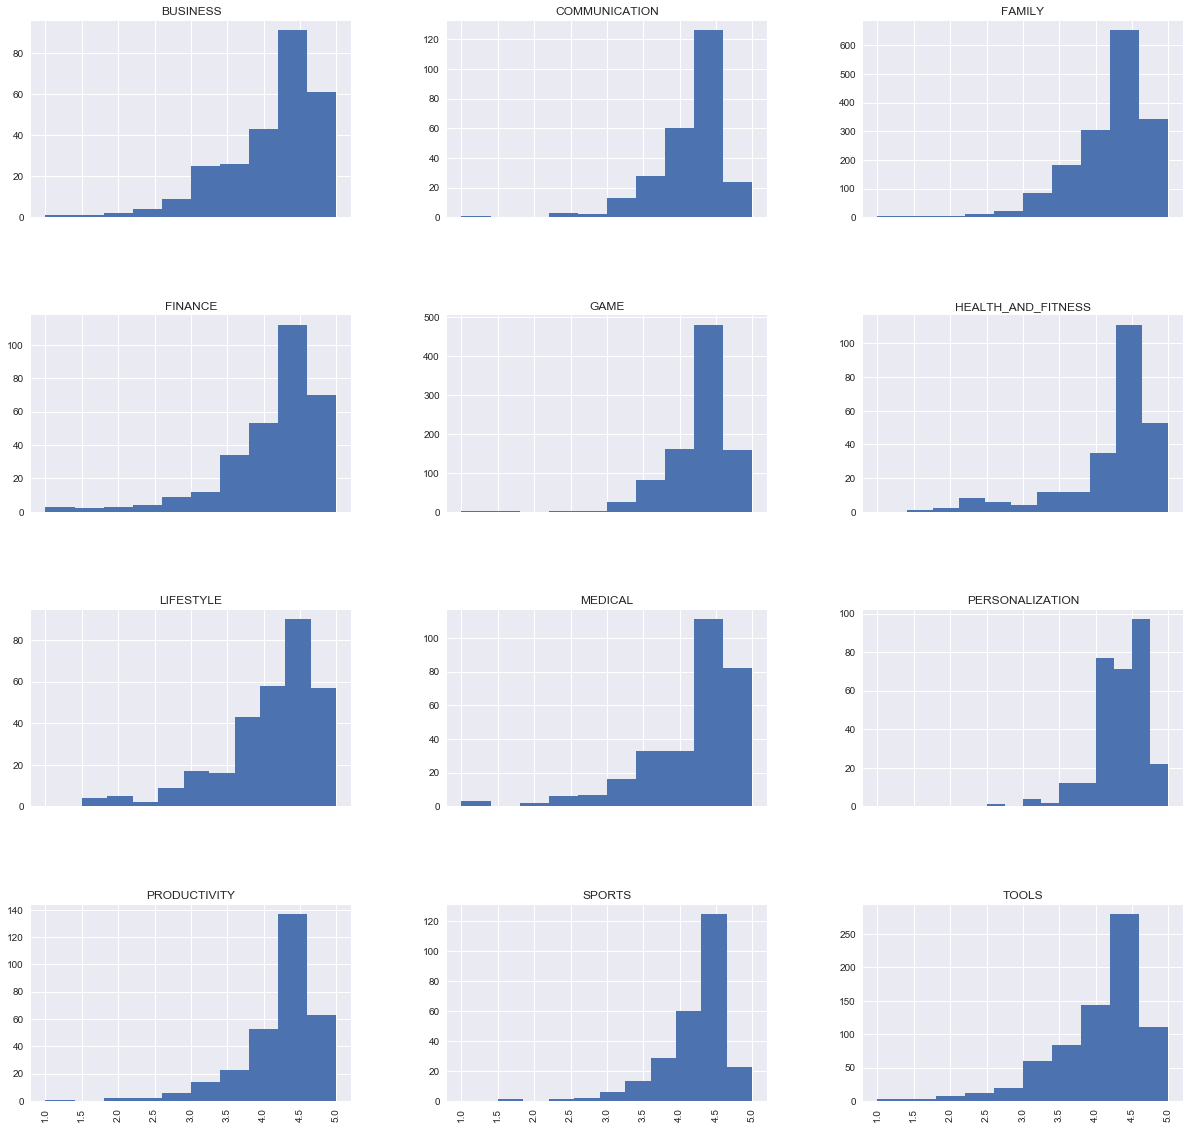

In [52]:
grupo2 = df.groupby('Category').filter(lambda x: len(x) > 286).reset_index()

#Asignando a una variable conseguimos que o queden las llamadas de antes de las gráficas
grafic = grupo2['Rating'].hist(by=grupo2['Category'], sharex=True, figsize=(20, 20))

# 4 - Métodos Estadísticos Simples

## 4.1 - Objetivos discretos 

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
# decido quedarme sólo con algunas columnas
data = df[['Rating', 'Reviews', 'Size', 'Installs', 'Category', 'Android', 'Type']].dropna()

# Convertimos los atributos categóricos a vectores de la base canónica
data_X = pd.get_dummies(data.drop('Type', axis=1))
data_y = pd.get_dummies(data.Type, drop_first=True)

# Separamos los datos en el conjunto de entrenamiento en el test
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y)

### 4.1.1 - Selección de clasificadores:
Vamos a probar ahora unos cuantos clasificadores incluyendo el anterior (con os parámetros ya óptimos que conocemos)

In [55]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classifiers = {
    
    
    "KNN(3)"        : KNeighborsClassifier(3),
#    "Linear SVM"    : SVC(kernel="linear"),
    "RBF SVM"       : SVC(gamma=2, C=1),
#    "Gaussian Proc" : GaussianProcessClassifier(1.0 * RBF(1.0)),
    "Desition Tree" : DecisionTreeClassifier(max_depth=7),
    "Random Forest" : RandomForestClassifier(max_depth=3, n_estimators=150),
    "Neural Net"    : MLPClassifier(alpha=1),
    "AdaBoost"      : AdaBoostClassifier(),
    "Naive Bayes"   : GaussianNB(),
    "QDA"           : QuadraticDiscriminantAnalysis()
}

In [56]:
for name, classifier in classifiers.items():
    classifier.fit(X_train[['Rating', 'Reviews', 'Size', 'Installs']], y_train)
    train = classifier.score(X_train[['Rating', 'Reviews', 'Size', 'Installs']], y_train)
    score = classifier.score(X_test[['Rating', 'Reviews', 'Size', 'Installs']], y_test)
    #print("{:<15} score {.:4f}".format(name, score))
    print("Puntuacioes de {}, Entrenamiento: {:.2%}, Test: {:.2%}".format(name, train, score))

Puntuacioes de KNN(3), Entrenamiento: 95.11%, Test: 91.60%
Puntuacioes de RBF SVM, Entrenamiento: 99.49%, Test: 93.02%
Puntuacioes de Desition Tree, Entrenamiento: 94.91%, Test: 92.28%
Puntuacioes de Random Forest, Entrenamiento: 92.07%, Test: 93.07%
Puntuacioes de Neural Net, Entrenamiento: 91.86%, Test: 93.02%
Puntuacioes de AdaBoost, Entrenamiento: 93.03%, Test: 93.58%
Puntuacioes de Naive Bayes, Entrenamiento: 42.49%, Test: 43.10%
Puntuacioes de QDA, Entrenamiento: 47.21%, Test: 46.85%


### 4.1.2 - Búsqueda de los mejores parámetros con GridSearchCV 
Vamos a seleccionar los tres mejores métodos y buscar qué parámetros se adaptan mejor:

In [57]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [58]:
gbcv = GridSearchCV(GradientBoostingClassifier(), 
                   param_grid = {
                       'learning_rate':[0.001, 0.01, 0.1],
                       'n_estimators':[50, 100, 150, 200],
                       'max_depth':[3, 5, 10]
                   })
gbcv.fit(data_X[['Rating', 'Reviews', 'Size', 'Installs']], data_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': [50, 100, 150, 200], 'max_depth': [3, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [59]:
pd.DataFrame(gbcv.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
24,0.104269,0.002355,0.001999,2.247832e-07,0.1,3,50,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.928450,0.934384,0.926289,0.929707,0.003422,1,0.935236,0.942705,0.944622,0.940854,0.004049
19,0.832820,0.031880,0.013658,1.246322e-03,0.01,5,200,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.929727,0.930550,0.927141,0.929139,0.001452,2,0.942693,0.945048,0.948882,0.945541,0.002551
18,0.635942,0.016489,0.010327,1.698662e-03,0.01,5,150,"{'learning_rate': 0.01, 'max_depth': 5, 'n_est...",0.927172,0.929271,0.930550,0.928997,0.001392,3,0.936941,0.941640,0.945687,0.941423,0.003574
28,0.194214,0.005246,0.003997,2.247832e-07,0.1,5,50,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.933986,0.926289,0.925863,0.928713,0.003733,4,0.957818,0.959744,0.960596,0.959386,0.001162
27,0.399420,0.008801,0.006662,4.710894e-04,0.1,3,200,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",0.934838,0.921602,0.925863,0.927435,0.005517,5,0.953771,0.958466,0.958679,0.956972,0.002265


El acierto del test no esta mál pero el acierto del entrenamiento es demasiado alto

In [60]:
accv = GridSearchCV(AdaBoostClassifier(), 
                   param_grid = {
                       'learning_rate':[0.001, 0.01, 0.1],
                       'n_estimators':[50, 100, 150, 200]
                   })
accv.fit(data_X[['Rating', 'Reviews', 'Size', 'Installs']], data_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': [50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [61]:
pd.DataFrame(accv.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
11,0.700568,0.112361,0.077619,0.000471,0.1,200,"{'learning_rate': 0.1, 'n_estimators': 200}",0.922913,0.923306,0.923732,0.923317,0.000335,1,0.923306,0.92311,0.924175,0.923530,0.000463
0,0.159568,0.003856,0.020653,0.000472,0.001,50,"{'learning_rate': 0.001, 'n_estimators': 50}",0.922913,0.923306,0.923306,0.923175,0.000185,2,0.923306,0.92311,0.923110,0.923175,0.000093
1,0.317803,0.005096,0.041975,0.001413,0.001,100,"{'learning_rate': 0.001, 'n_estimators': 100}",0.922913,0.923306,0.923306,0.923175,0.000185,2,0.923306,0.92311,0.923110,0.923175,0.000093
2,0.541665,0.111665,0.060297,0.000472,0.001,150,"{'learning_rate': 0.001, 'n_estimators': 150}",0.922913,0.923306,0.923306,0.923175,0.000185,2,0.923306,0.92311,0.923110,0.923175,0.000093
3,0.618286,0.001884,0.079285,0.000942,0.001,200,"{'learning_rate': 0.001, 'n_estimators': 200}",0.922913,0.923306,0.923306,0.923175,0.000185,2,0.923306,0.92311,0.923110,0.923175,0.000093


In [62]:
rfcv = GridSearchCV(RandomForestClassifier(), 
                   param_grid = {
                       'n_estimators':[10, 50, 100, 150, 200],
                   })
rfcv.fit(data_X[['Rating', 'Reviews', 'Size', 'Installs']], data_y)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [10, 50, 100, 150, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
pd.DataFrame(rfcv.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
4,0.919101,0.036722,0.076953,0.010978,200,{'n_estimators': 200},0.932709,0.919472,0.917341,0.923175,0.006798,1,0.999361,0.999574,0.999361,0.999432,0.000100
3,0.684244,0.025089,0.051968,0.002159,150,{'n_estimators': 150},0.933560,0.918193,0.916915,0.922891,0.007564,2,0.999361,0.999574,0.999361,0.999432,0.000100
2,0.489698,0.049151,0.035645,0.001246,100,{'n_estimators': 100},0.933560,0.915637,0.917767,0.922323,0.007995,3,0.999148,0.999574,0.999361,0.999361,0.000174
1,0.228193,0.006940,0.019653,0.001698,50,{'n_estimators': 50},0.932709,0.921602,0.910950,0.921755,0.008884,4,0.998722,0.999148,0.999361,0.999077,0.000266
0,0.048970,0.003557,0.004331,0.000471,10,{'n_estimators': 10},0.929727,0.916063,0.916915,0.920903,0.006251,5,0.990200,0.991054,0.991480,0.990912,0.000532


## 4.2 -  Objetivo Real: Regresión para el Rating

In [64]:
from sklearn.model_selection import cross_val_predict

### Cargamos nuevos datos para hacer comparativa regresión

In [65]:
data = df[['Rating', 'Reviews', 'Size', 'Installs', 'Category', 'Android', 'Type']].dropna()
X = pd.get_dummies(data.drop('Rating', axis=1))
y = data.Rating

### 4.2.1- Establecemos las métricas con las que queremos realizar las comparativas 

In [66]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

### 4.2.2 - Establecemos los  Métodos que queremos comparar con las métricas

In [67]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.svm import SVR, LinearSVR

###  4.2.3 - Realizamos la comparativa utiizando "cross_val_predict"

In [68]:
regressors = [
    LinearRegression(),
#    RANSACRegressor(),    ---->    Lo retiro porque no terminaba la ejecución
    GaussianProcessRegressor(),
    KNeighborsRegressor(n_neighbors=9, metric='manhattan'),
    SVR(),
    LinearSVR()
#    SVR(kernel='linear')  ---->    Lo retiro porque no terminaba la ejecución
]
for model in regressors:
    predictions = cross_val_predict(model, X, y, cv=10)
    print(model)    
    print("\tExplained Variance:", explained_variance_score(y, predictions))
    print("\tMean Absolute Error:", mean_absolute_error(y, predictions))
    print("\tR2 score:", r2_score(y, predictions))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
	Explained Variance: -0.007151988816368471
	Mean Absolute Error: 0.40505197545707866
	R2 score: -0.008130143258298084
GaussianProcessRegressor(alpha=1e-10, copy_X_train=True, kernel=None,
             n_restarts_optimizer=0, normalize_y=False,
             optimizer='fmin_l_bfgs_b', random_state=None)
	Explained Variance: -4.3155777105959885
	Mean Absolute Error: 3.823796182853044
	R2 score: -49.91131196034333
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='manhattan',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')
	Explained Variance: 0.03670791164955234
	Mean Absolute Error: 0.3833822462053079
	R2 score: 0.03662645968499034
SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
	Explained Variance: -0.026438217599162872
	Mean Absolute Error: 0.3924246248828605
	R2 s

### 4.2.4 - Elegimos el método más conveniente y Comparamos sus hiperparámetros 
El método elegido es 'LinearRegression' compararemos sus parámetros utilizando "GridSearchCV"  

In [69]:
lr = LinearRegression()
parameters = {'fit_intercept':[True, False],
              'normalize': [True, False]}

lr_grid = GridSearchCV(lr, parameters)
lr_grid.fit(X, y)

GridSearchCV(cv=None, error_score='raise',
       estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [70]:
pd.DataFrame(lr_grid.cv_results_).sort_values('mean_test_score', ascending=False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
1,0.011327,0.001247,0.001000,1.325077e-06,True,False,"{'fit_intercept': True, 'normalize': False}",-3.181909e-01,-0.004145,-0.004051,-1.088251e-01,1.480755e-01,1,0.044173,0.051077,0.055167,0.050139,0.004537
2,0.010327,0.000471,0.000998,1.123916e-07,False,True,"{'fit_intercept': False, 'normalize': True}",-3.524323e-01,-0.004145,-0.004051,-1.202422e-01,1.642182e-01,2,0.044173,0.051077,0.055167,0.050139,0.004537
3,0.010993,0.000816,0.000999,1.946680e-07,False,False,"{'fit_intercept': False, 'normalize': False}",-3.524323e-01,-0.004145,-0.004051,-1.202422e-01,1.642182e-01,2,0.044173,0.051077,0.055167,0.050139,0.004537
0,0.018988,0.001631,0.001667,4.712590e-04,True,True,"{'fit_intercept': True, 'normalize': True}",-1.006859e+27,-0.004008,-0.003770,-3.357150e+26,4.746716e+26,4,0.043319,0.050909,0.054957,0.049728,0.004824


Conclusión:

    Los parámetros óptimos son: param_fit_intercept=True y param_normalize=False (que son los valores que tiene por defecto)

# 5 - Análisis de las Reviews en texto

## 5.1 - Sentiment Analysis

In [71]:
# Descargamos las reviews 
zip_zf = zipfile.ZipFile(r'C:\Users\Usuario\Downloads\google-play-store-apps.zip') 
rev_df = pd.read_csv(zip_zf.open('googleplaystore_user_reviews.csv')).drop_duplicates()
copia_rev_df = pd.read_csv(zip_zf.open('googleplaystore_user_reviews.csv'))
rev_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [72]:
rev_df.dtypes

App                        object
Translated_Review          object
Sentiment                  object
Sentiment_Polarity        float64
Sentiment_Subjectivity    float64
dtype: object

In [73]:
rev_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,29697.000000,29697.000000
mean,0.188836,0.490848
std,0.355672,0.266029
min,-1.000000,0.000000
25%,0.000000,0.350000
50%,0.157143,0.514286
75%,0.422500,0.652500
max,1.000000,1.000000


Lo primero que vamos a hacer son las líneas en las que el campo del texto de la revisión no aparezca. Despues crearemos un nuevo DataFrame con todos los datos disponibles. A partir de ahí nos ayudaremos de los agrupaminetos para sacar conclusiones

In [74]:
rev_df = rev_df.dropna(subset=['Translated_Review'])

# Unimos los nuevos datos a los que ya teníamos
df_merge = pd.merge(df, rev_df, how='inner', on='App')

In [75]:
# Agrupamos por Categoría y Sentimiento poniendo como resultado la cuenta de Apps
# Sin reset_index() cada repetición quedaría en un sólo hueco.
    
sentiment_category_sum = df_merge.groupby(['Category', 'Sentiment']).agg({'App' : 'count'}).reset_index()
sentiment_category_sum.head()

,Category,Sentiment,App
0,ART_AND_DESIGN,Negative,54
1,ART_AND_DESIGN,Neutral,60
2,ART_AND_DESIGN,Positive,240
3,AUTO_AND_VEHICLES,Negative,17
4,AUTO_AND_VEHICLES,Neutral,36


In [76]:
category_sum = df_merge.groupby(['Category']).agg({'Sentiment' : 'count'}).reset_index()
category_sum.head()

,Category,Sentiment
0,ART_AND_DESIGN,354
1,AUTO_AND_VEHICLES,283
2,BEAUTY,317
3,BOOKS_AND_REFERENCE,617
4,BUSINESS,657


In [77]:
# Creamos un nuevo DataFrame con las agrupaciones que hemos hecho y le incluimos dos columnas más, 
# una de ellas en formato % para una mejor visualización

df_category = pd.merge(sentiment_category_sum, category_sum, on='Category')
df_category['frec_sentiment'] = (
    df_category.App / df_category.Sentiment_y).apply(
    lambda x: '{:.2f}'.format(x))
df_category['percent_sentiment'] = (
    df_category.App / df_category.Sentiment_y).apply(
    lambda x: '{:.2%}'.format(x))
df_category.head()

,Category,Sentiment_x,App,Sentiment_y,frec_sentiment,percent_sentiment
0,ART_AND_DESIGN,Negative,54,354,0.15,15.25%
1,ART_AND_DESIGN,Neutral,60,354,0.17,16.95%
2,ART_AND_DESIGN,Positive,240,354,0.68,67.80%
3,AUTO_AND_VEHICLES,Negative,17,283,0.06,6.01%
4,AUTO_AND_VEHICLES,Neutral,36,283,0.13,12.72%


Vamos a ver una representación de cómo se distribuyen las Reviews dependiendo del sentimiento asirnado entre las diferentes categorías de apps

In [78]:
trace1 = go.Bar(
    x=list(df_category.Category[::3]),
    y= df_category.frec_sentiment[::3],
    name='Negative',
    marker=dict(color = 'rgb(100,0,0)')
)
trace2 = go.Bar(
    x=list(df_category.Category[::3]),
    y= df_category.frec_sentiment[1::3],
    name='Neutral',
    marker=dict(color = 'rgb(0,0,100)')
)
trace3 = go.Bar(
    x=list(df_category.Category[::3]),
    y= df_category.frec_sentiment[2::3],
    name='Positive',
    marker=dict(color = 'rgb(0,100,0)')
)

data = [trace1, trace2, trace3]

layout = go.Layout(
    title = 'Análisis de sentimientos por Categoría',
    barmode = 'relative'
)

plotly.offline.iplot({'data': data, 'layout': layout})

Conclusiones

   - En todos los grupos priman los comentarios con sentimiento positivo.
   

   - Los grupos con mayores frecuencias de sentimiento positivo en las revisiones son: "COMICS" y "AUTO_AND_VEHICLES".
    
    
   - Los grupos con mayores frecuencias de sentimiento negativo son: "BEAUTY", "BUSINES".

## 5.1 - WordClouds
Veremos este tipo de representaciones para diferentes agrupamientos de los datos

In [79]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords # Finalmente no lo uso

# Creamos nuestra parada y la actualizamos con palabras de nuestro entorno
stopwords = set(STOPWORDS)
stopwords.update(
    ['app', 'APP' ,'ap', 'App', 'apps', 'application', 'app is', 'APP is' ,'ap is', 'App is', 'apps is', 'application is'])

En total hay 3203624 palabras en todas las revisiones


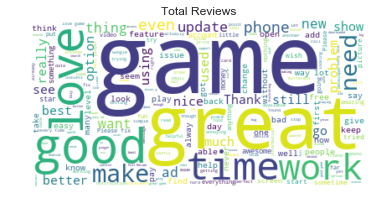

In [80]:
# Unimos todas las revisiones para echar unvistazo general
text = " ".join(review for review in rev_df.Translated_Review)
print('En total hay {} palabras en todas las revisiones'.format(len(text)))

# Generamos la imagen 
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Visualizamos la imagen
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Total Reviews')
plt.show()

### 5.1.1 - Tipo: Gratis VS de pago

In [81]:
# Juntamos las revisiones correspondientes a las apps gratis y las de pago:
rev_gratis = " ".join(review for review in df_merge[df_merge.Type == 'Free'].Translated_Review)
rev_pago = " ".join(review for review in df_merge[df_merge.Type == 'Paid'].Translated_Review)

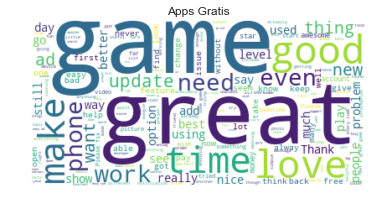

In [82]:
# Generamos la imagen
wordcloud_gratis = WordCloud(stopwords=stopwords, background_color="white").generate(rev_gratis)

# Visualizamos la imagen
plt.imshow(wordcloud_gratis, interpolation='bilinear')
plt.axis("off")
plt.title('Apps Gratis')
plt.show()

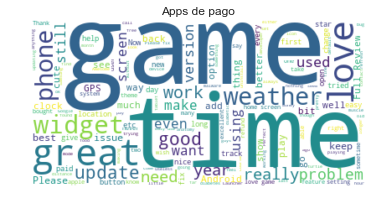

In [83]:
# Generamos la imagen
wordcloud_pago = WordCloud(stopwords=stopwords, background_color="white").generate(rev_pago)

# Visualizamos la imagen
plt.imshow(wordcloud_pago, interpolation='bilinear')
plt.axis("off")
plt.title('Apps de pago')
plt.show()

Conclusión:

   - Como podemos ver, en ambas categorías las palabras son muy parecidas, lo que nos indica que en ambas categorías priman las reviews con sentimiento positivo al resto.
   
   
   - Como ya veíamos en la primera imagen que incluía todas las palabras, lapalabra que mejor representa al conjunto es "game". Algo que en principio no coincide con el número de aplicaciones en la categoría "GAMES". Posiblemente la gente se refiera a juegos en lugar de decir aplicaciones en esa categoría y puede que en las demás. 
   
           ¿Añadir "games" a stopwords?
           
   - Curiosamente la segunda palabra más representativa de las gratis es "great" y de las de pago "time".

### 5.1.2 - Sentiment: Negative VS  Neutral VS Positive

In [84]:
# Juntamos las revisiones correspondientes a los diferentes sentimientos de las reviews de cada app:
rev_neg = " ".join(
    review for review in df_merge[df_merge.Sentiment == 'Negative'].Translated_Review)
rev_neu = " ".join(
    review for review in df_merge[df_merge.Sentiment == 'Neutral'].Translated_Review)
rev_pos = " ".join(
    review for review in df_merge[df_merge.Sentiment == 'Positive'].Translated_Review)

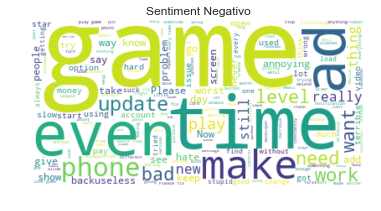

In [85]:
# Generamos la imagen
wordcloud_neg2 = WordCloud(stopwords=stopwords, background_color="white").generate(rev_neg)

# Visualizamos la imagen
plt.imshow(wordcloud_neg2, interpolation='bilinear')
plt.axis("off")
plt.title('Sentiment Negativo')
plt.show()

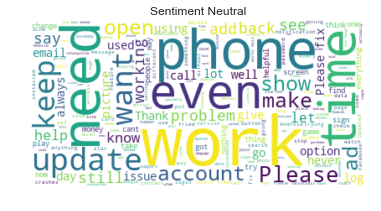

In [86]:
# Generamos la imagen
wordcloud_neu2 = WordCloud(stopwords=stopwords, background_color="white").generate(rev_neu)
# Visualizamos la imagen
plt.imshow(wordcloud_neu2, interpolation='bilinear')
plt.axis("off")
plt.title('Sentiment Neutral')
plt.show()

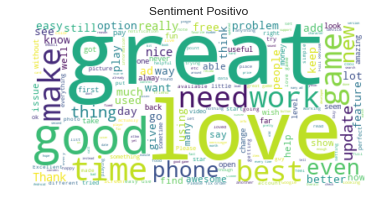

In [87]:
# Generamos la imagen
wordcloud_pos2 = WordCloud(stopwords=stopwords, background_color="white").generate(rev_pos)

# Visualizamos la imagen
plt.imshow(wordcloud_pos2, interpolation='bilinear')
plt.axis("off")
plt.title('Sentiment Positivo')
plt.show()

### 5.1.3 - Categorical Rating: Negative VS  Neutral VS Positive
Para este caso, primero hay que crear una clase categórica que dependa del valor del rating. Luego podremos ver si el resultado obtenido es similar al obtenido analizando el sentiment (en principio debería serlo)

In [88]:
# Creamos la nueva clase que divida a las aplicaciones en grupos equivalentes a sentiment pero que dependa del rating
df_merge['cat_rating'] = df_merge['Rating'].apply(
    lambda x: ('Negative' if x < 3 else 'Neutral') if x < 4 else 'Positive')
df_merge['cat_rating'] = pd.Categorical(df_merge['cat_rating'], ['Negative', 'Neutral', 'Positive'])
df_merge.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Current Ver,Android Ver,Android,installs_scale,reviews_scale,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity,cat_rating
0,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,Antigua,5.69897,2.985426,A kid's excessive ads. The types ads allowed a...,Negative,-0.250,1.000000,Neutral
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,Antigua,5.69897,2.985426,It bad >:(,Negative,-0.725,0.833333,Neutral
2,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,Antigua,5.69897,2.985426,like,Neutral,0.000,0.000000,Neutral
3,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,Antigua,5.69897,2.985426,I love colors inspyering,Positive,0.500,0.600000,Neutral
4,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,...,2.0.0,4.0.3 and up,Antigua,5.69897,2.985426,I hate,Negative,-0.800,0.900000,Neutral


In [89]:
# Juntamos las revisiones correspondientes a las diferentes categorías de Rating:
rating_neg = " ".join(
    review for review in df_merge[df_merge.cat_rating == 'Negative'].Translated_Review)
rating_neu = " ".join(
    review for review in df_merge[df_merge.cat_rating == 'Neutral'].Translated_Review)
rating_pos = " ".join(
    review for review in df_merge[df_merge.cat_rating == 'Positive'].Translated_Review)

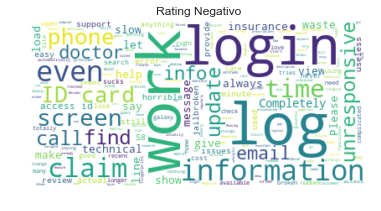

In [90]:
# Generamos la imagen
wordcloud_neg = WordCloud(stopwords=stopwords, background_color="white").generate(rating_neg)

# Visualizamos la imagen
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.title('Rating Negativo')
plt.show()

Conclusiónes:

- Parece que los comentarios de las apps con bajo rating influye bastante tener que logearse ya que las palabras "log" y "loging" son las más representativas aun siendo la misma.


- Otro problema pude ser la , excesiva demanda de información o permisos para una tarea que quizás no los necesite. ("information", "ID_card")


- Otras veces puede que ni siquiera funciones ("even", "work")

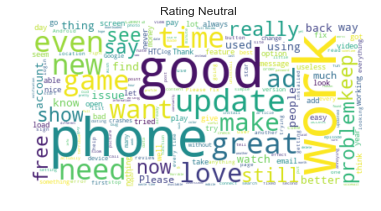

In [91]:
# Generamos la imagen
wordcloud_neu = WordCloud(stopwords=stopwords, background_color="white").generate(rating_neu)

# Visualizamos la imagen
plt.imshow(wordcloud_neu, interpolation='bilinear')
plt.axis("off")
plt.title('Rating Neutral')
plt.show()

Observaciones:

- Que "update" y "new" sean de las más representativas y a a misma altura indica que la actualización pudo afctar a la puntuación de la app. No sabemos si para bien o para mál.

      ¿Necesitaríamos para este grupo en concreto evolución del rating en el tiempo o con un vitazo a las revieus valdrá?

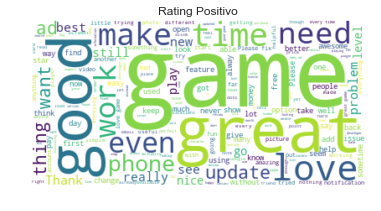

In [92]:
# Generamos la imagen
wordcloud_pos = WordCloud(stopwords=stopwords, background_color="white").generate(rating_pos)

# Visualizamos la imagen
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.title('Rating Positivo')
plt.show()